<a href="https://colab.research.google.com/github/taticorrea/monografia/blob/master/NS_NEWTON_TOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando módulos
import math as mt                         #funções matemáticas nativas do Python
import numpy as np                        
import csv
import pandas as pd
import matplotlib.pyplot as plt           #módulo para plotar gráficos
from scipy.optimize import curve_fit      #modulo para fazer a regressao
%matplotlib inline

In [2]:
#Constantes no SI
c = 2.99792458E+8                                #m/s
me = 9.109389E-31                                #kg
mn = 1.674928E-27                                #kg
A_Z_Fe = 2.15 #52Fe
#A_Z_He = 1 #2He
#A_Z_C = 2 #12C
G = 6.67408E-11 #N.m²/kg²
Msol = 1.98892E+30
hbar = 1.054571726E-34                           #J.s
e_zero = ((mn**4)*(c**5))/(np.pi**2*hbar**3) #J/m³

In [3]:
e_zero

1.6464933099339044e+36

#EoS

In [4]:
k = 1E-21
delta = 1E-21
while k < 2*mn*c:
  x = k/(mn*c)
  #e_Fe = (x**3*(A_Z_Fe)*mn**3*mn*c**5)/(3*np.pi**2*hbar**3) #trocar pela eq 81
  #e_Fe = (e_zero/8)*((2*x**3 + x)*((1  + x**2)**(1/2)) - mt.asinh(x)) + (x**3*(A_Z_Fe)*mn**3*mn*c**5)/(3*np.pi**2*hbar**3)
  e_Fe = (e_zero/8)*((2*x**3 + x)*((1  + x**2)**(1/2)) - mt.asinh(x)) 
  P = (e_zero/24)*((2*x**3 - 3*x)*(1 + x**2)**(1/2) + 3*mt.asinh(x))
  with open('pressao_energia_Fe.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([x,k,e_Fe,P])
  k = k + delta
  #print('x: ',x,'k: ',k,'e: ',e_Fe,'P: ',P)
  pe_Fe = pd.read_csv('pressao_energia_Fe.csv', names=['x','k','dens. energia (J/m3)','pressao (N/m2)'])

In [5]:
pe_Fe

,x,k,dens. energia (J/m3),pressao (N/m2)
0,0.001992,1.000000e-21,4.334996e+27,3.438580e+21
1,0.003983,2.000000e-21,3.468009e+28,1.100354e+23
2,0.005975,3.000000e-21,1.170460e+29,8.355744e+23
3,0.007966,4.000000e-21,2.774447e+29,3.521070e+24
4,0.009958,5.000000e-21,5.418900e+29,1.074531e+25
...,...,...,...,...
999,1.991513,1.000000e-18,7.862398e+36,1.798043e+36
1000,1.993505,1.001000e-18,7.891420e+36,1.805770e+36
1001,1.995496,1.002000e-18,7.920523e+36,1.813523e+36
1002,1.997488,1.003000e-18,7.949708e+36,1.821300e+36


In [6]:
###################### Fit ######################
y_Fe = np.array(pe_Fe['dens. energia (J/m3)'])
x_Fe = np.array(pe_Fe['pressao (N/m2)'])

def fit_func(p, a, b):           #fit
    return a*(p**(3/5)) + b*p        #a-> caso nao-rel     b-> caso rel

pars_Fe, cov_Fe = curve_fit(fit_func, x_Fe, y_Fe,p0=[1E+14,2]) 
stdevs_Fe = np.sqrt(np.diag(cov_Fe))  

Anrel = pars_Fe[0]
Arel = pars_Fe[1]

#Anrel = 2.4216 #ARTIGO
#Arel = 2.8663

#Anrel = 4.99302E+14 #DISSERTACAO JEAN da +- certo
#Arel = 2.78948
print('Estrela de neutrons Fe')
print('Anrel {:e}'.format(Anrel))
print('Arel', Arel)
print('Anrel-error {:e} '.format(stdevs_Fe[0]))
print('Arel-error {:e} '.format(stdevs_Fe[1]))

Estrela de neutrons Fe
Anrel 5.016441e+14
Arel 2.789492656078549
Anrel-error 1.559914e+11 
Arel-error 6.070814e-04 


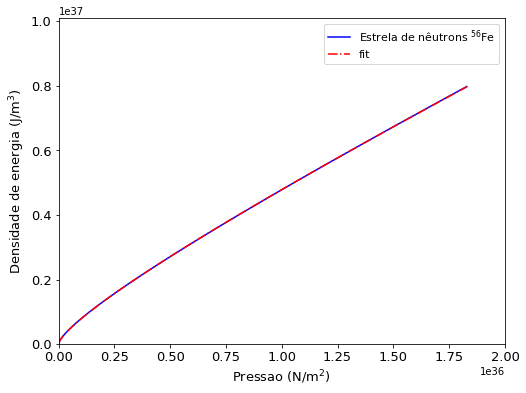

In [7]:
######### Plot
plt.figure(figsize=(8,6))
plt.plot(pe_Fe['pressao (N/m2)'], pe_Fe['dens. energia (J/m3)'], color = 'blue', label = r'Estrela de nêutrons $^{56}$Fe')
plt.plot(x_Fe, fit_func(x_Fe, *pars_Fe), color = 'red', label = r'fit', linestyle = '-.')

plt.yticks(size =  13)
plt.xticks(size =  13)
plt.ylim(0,1.01E+37)
plt.xlim(0,2E+36)

#plt.yscale('log')
#plt.xscale('log')

plt.ylabel(r'Densidade de energia (J/m$^{3}$)',size = 13)
plt.xlabel(r'Pressao (N/m$^2$)', size = 13)

plt.legend(prop = {'size':11})
plt.savefig('pxe_NS.png')
plt.show()

#NEWTON

In [ ]:
h = 50 #m
def f(R,P,M): #dp/dr
    e = Anrel*(P**(3/5)) + Arel*P
    f = -G*M/(c**2*R**2)
    return f*e
def g(R,P,M): #dm/dr
    e = Anrel*(P**(3/5)) + Arel*P
    f = (4*np.pi*R**2)/(c**2)
    return f*e

#Condicoes iniciais
R = 1e-2
M = 1e-2
P = 1E+32

with open('NS-NEWTON_regimequalquer-32.csv', 'a', newline='') as file:
  writter = csv.writer(file)
  writter.writerow(['p (N/m2)','m (Msol)','R (km)'])
  writter.writerow([P,M,R])
while P > 0:
  #Calculando valores de r
  k1P = h*f(R,       P,              M )    
  k1M = h*g(R,       P,              M)
  k2P = h*f(R + h/2, P + k1P/2, M + k1M/2)  
  k2M = h*g(R + h/2, P + k1P/2, M + k1M/2)
  k3P = h*f(R + h/2, P + k2P/2, M + k2M/2)
  k3M = h*g(R + h/2, P + k2P/2, M + k2M/2)
  k4P = h*f(R + h,   P + k3P, M + k3M)
  k4M = h*g(R + h,   P + k3P, M + k3M)
  with open('NS-NEWTON_regimequalquer-32.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([P,M/Msol,R*1E-3])      
    #Calculando P+1, M+1 e R
    P = P + (1/6)*(k1P + 2*k2P + 2*k3P + k4P)
    M = M + (1/6)*(k1M + 2*k2M + 2*k3M + k4M)
    R = R + h
    #print('P (N/m2):','{:e}'.format(P),' M (Msol):',M/Msol,'  R (km):',R*1E-3)

In [ ]:
df_32_NEWTON = pd.read_csv('NS-NEWTON_regimequalquer-32.csv')
df_33_NEWTON = pd.read_csv('NS-NEWTON_regimequalquer-33.csv')
df_34_NEWTON = pd.read_csv('NS-NEWTON_regimequalquer-34.csv')
df_35_NEWTON = pd.read_csv('NS-NEWTON_regimequalquer-35.csv')
df_36_NEWTON = pd.read_csv('NS-NEWTON_regimequalquer-36.csv')

In [ ]:
df_35_NEWTON

,p (N/m2),m (Msol),R (km)
0,1.000000e+35,1.000000e-02,0.01000
1,1.000000e+35,5.027854e-33,0.00001
2,9.996705e+34,2.287166e-06,0.05001
3,9.988760e+34,1.828702e-05,0.10001
4,9.975597e+34,6.167741e-05,0.15001
...,...,...,...
190,2.295180e+30,1.522899e+00,9.45001
191,1.390939e+30,1.523127e+00,9.50001
192,7.494381e+29,1.523292e+00,9.55001
193,3.330615e+29,1.523401e+00,9.60001


#TOV

In [ ]:
h = 500 #m
def f(R,P,M): #dp/dr = -GABCD
  e = Anrel*(P**(3/5)) + Arel*P
  A = e*M/(c**2*R**2)
  B = 1 + P/e
  C = 1 + 4*np.pi*R**3*P/(M*c**2)
  D = (1 - 2*G*M/(c**2*R))**(-1)
  return -G*A*B*C*D
def g(R,P,M): #dm/dr
  e = Anrel*(P**(3/5)) + Arel*P
  f = (4*np.pi*R**2)/(c**2)
  return f*e

#Condicoes iniciais
R = 1e-2
M = 1e-2
P = 1E+32

with open('NS-TOV_regimequalquer-32.csv', 'a', newline='') as file:
  writter = csv.writer(file)
  writter.writerow(['p (N/m2)','m (Msol)','R (km)'])
while P > 0:
  #Calculando valores de r
  k1P = h*f(R,       P,              M )    
  k1M = h*g(R,       P,              M)
  k2P = h*f(R + h/2, P + k1P/2, M + k1M/2)  
  k2M = h*g(R + h/2, P + k1P/2, M + k1M/2)
  k3P = h*f(R + h/2, P + k2P/2, M + k2M/2)
  k3M = h*g(R + h/2, P + k2P/2, M + k2M/2)
  k4P = h*f(R + h,   P + k3P, M + k3M)
  k4M = h*g(R + h,   P + k3P, M + k3M)
  with open('NS-TOV_regimequalquer-32.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([P,M/Msol,R*1E-3])      
    #Calculando P+1, M+1 e R
    P = P + (1/6)*(k1P + 2*k2P + 2*k3P + k4P)
    M = M + (1/6)*(k1M + 2*k2M + 2*k3M + k4M)
    R = R + h
    #print('P (N/m2):','{:e}'.format(P),' M (Msol):',M/Msol,'  R (km):',R*1E-3)

In [23]:
df_32_TOV = pd.read_csv('NS-TOV_regimequalquer-32.csv')
df_2e32_TOV = pd.read_csv('NS-TOV_regimequalquer-2e32.csv')
df_4e32_TOV = pd.read_csv('NS-TOV_regimequalquer-4e32.csv')


df_33_TOV = pd.read_csv('NS-TOV_regimequalquer-33.csv')
df_2e33_TOV = pd.read_csv('NS-TOV_regimequalquer-2e33.csv')
df_4e33_TOV = pd.read_csv('NS-TOV_regimequalquer-4e33.csv')

df_34_TOV = pd.read_csv('NS-TOV_regimequalquer-34.csv')
df_2e34_TOV = pd.read_csv('NS-TOV_regimequalquer-2e34.csv')
df_4e34_TOV = pd.read_csv('NS-TOV_regimequalquer-4e34.csv')

df_35_TOV = pd.read_csv('NS-TOV_regimequalquer-35.csv')
df_2e35_TOV = pd.read_csv('NS-TOV_regimequalquer-2e35.csv')
df_4e35_TOV = pd.read_csv('NS-TOV_regimequalquer-4e35.csv')

df_36_TOV = pd.read_csv('NS-TOV_regimequalquer-36.csv')
df_2e36_TOV = pd.read_csv('NS-TOV_regimequalquer-2e36.csv')
df_4e36_TOV = pd.read_csv('NS-TOV_regimequalquer-4e36.csv')

#PLOTS

##1E+32

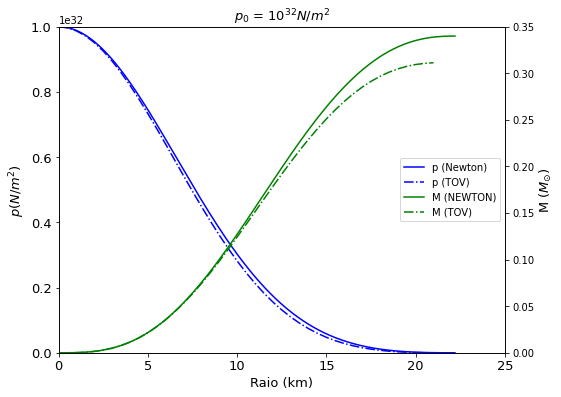

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{32} N/m^2$',size = 13)
lns1 = ax.plot(df_32_NEWTON['R (km)'],df_32_NEWTON['p (N/m2)'],color ='blue', linestyle='-', label = r'p (Newton)')
lns2 = ax.plot(df_32_TOV['R (km)'],df_32_TOV['p (N/m2)'],color ='blue', linestyle='-.', label = r'p (TOV)')
plt.ylim(0,1E+32)
ax.set_ylabel(r'$p (N/m^2)$', size = 13)

plt.yticks(size = 13)
plt.xticks(size = 13)

ax2 = ax.twinx()
lns3 = ax2.plot(df_32_NEWTON['R (km)'],df_32_NEWTON['m (Msol)'],color ='green',linestyle='-', label = r'M (NEWTON)')
lns4 = ax2.plot(df_32_TOV['R (km)'],df_32_TOV['m (Msol)'],color ='green', linestyle='-.', label = r'M (TOV)')
ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size = 13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)
plt.ylim(0,0.35)
plt.xlim(0,25)
fig.savefig('NS_regimequalquer-32.png')

##1E+33

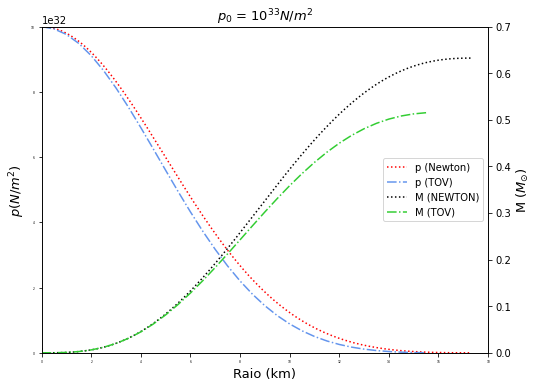

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{33} N/m^2$', size = 13)
lns1 = ax.plot(df_33_NEWTON['R (km)'],df_33_NEWTON['p (N/m2)'],color ='red', linestyle=':', label = r'p (Newton)')
lns2 = ax.plot(df_33_TOV['R (km)'],df_33_TOV['p (N/m2)'],color ='cornflowerblue', linestyle='-.', label = r'p (TOV)')
plt.ylim(0,1E+33)

ax.set_ylabel(r'$p (N/m^2)$', size = 13)

plt.yticks(size = 3)
plt.xticks(size = 3)

ax2 = ax.twinx()
lns3 = ax2.plot(df_33_NEWTON['R (km)'],df_33_NEWTON['m (Msol)'],color ='black',linestyle=':', label = r'M (NEWTON)')
lns4 = ax2.plot(df_33_TOV['R (km)'],df_33_TOV['m (Msol)'],color ='limegreen', linestyle='-.', label = r'M (TOV)')
ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size = 13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)
plt.xlim(0,18)
plt.ylim(0,0.7)

fig.savefig('NS_regimequalquer-33.png')

##1E+34

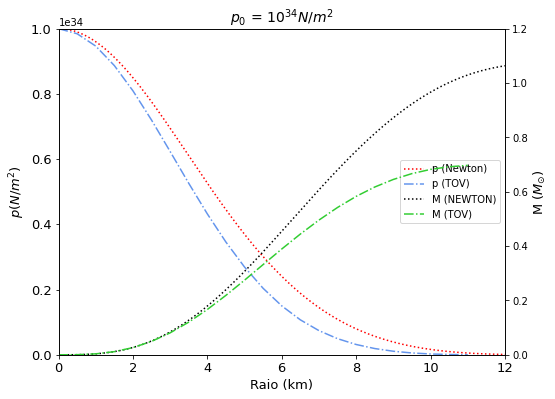

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{34} N/m^2$', size = 14)
lns1 = ax.plot(df_34_NEWTON['R (km)'],df_34_NEWTON['p (N/m2)'],color ='red', linestyle=':', label = r'p (Newton)')
lns2 = ax.plot(df_34_TOV['R (km)'],df_34_TOV['p (N/m2)'],color ='cornflowerblue', linestyle='-.', label = r'p (TOV)')
plt.ylim(0,1E+34)
ax.set_ylabel(r'$p (N/m^2)$',size = 13)

plt.yticks(size = 13)
plt.xticks(size = 13)

ax2 = ax.twinx()
lns3 = ax2.plot(df_34_NEWTON['R (km)'],df_34_NEWTON['m (Msol)'],color ='black',linestyle=':', label = r'M (NEWTON)')
lns4 = ax2.plot(df_34_TOV['R (km)'],df_34_TOV['m (Msol)'],color ='limegreen', linestyle='-.', label = r'M (TOV)')
ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size = 13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)
plt.xlim(0,12)
plt.ylim(0,1.2)

fig.savefig('NS_regimequalquer-34.png')

##1E+35

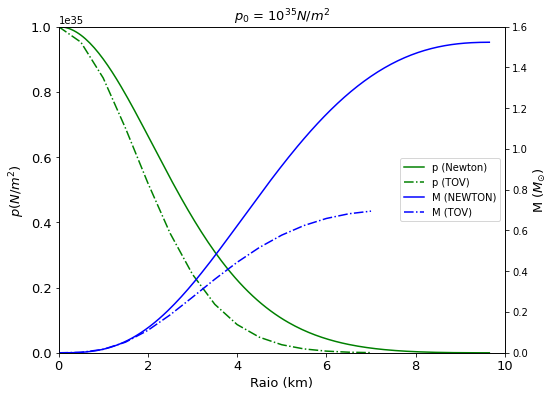

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{35} N/m^2$', size = 13)
lns1 = ax.plot(df_35_NEWTON['R (km)'],df_35_NEWTON['p (N/m2)'],color ='green', linestyle='-', label = r'p (Newton)')
lns2 = ax.plot(df_35_TOV['R (km)'],df_35_TOV['p (N/m2)'],color ='green', linestyle='-.', label = r'p (TOV)')
plt.ylim(0,1E+35)

ax.set_ylabel(r'$p (N/m^2)$', size = 13)

plt.yticks(size = 13)
plt.xticks(size = 13)

ax2 = ax.twinx()
lns3 = ax2.plot(df_35_NEWTON['R (km)'],df_35_NEWTON['m (Msol)'],color ='blue',linestyle='-', label = r'M (NEWTON)')
lns4 = ax2.plot(df_35_TOV['R (km)'],df_35_TOV['m (Msol)'],color ='blue', linestyle='-.', label = r'M (TOV)')
ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size  = 13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)
plt.ylim(0,1.6)
plt.xlim(0,10)

fig.savefig('NS_regimequalquer-35.png')

##all

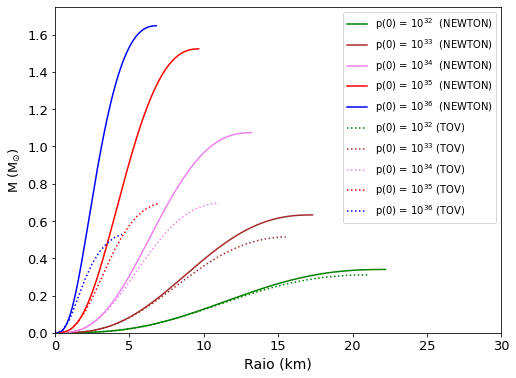

In [ ]:
plt.figure(figsize = (8,6))

#plt.plot(df_31_NEWTON['R (km)'],df_31_NEWTON['m (Msol)'],color ='red',label =r'p(0) = $10^{31}$  (NEWTON)', linestyle='-')
plt.plot(df_32_NEWTON['R (km)'],df_32_NEWTON['m (Msol)'],color ='green',label =r'p(0) = $10^{32}$  (NEWTON)', linestyle='-')
plt.plot(df_33_NEWTON['R (km)'],df_33_NEWTON['m (Msol)'],color ='brown',label =r'p(0) = $10^{33}$  (NEWTON)', linestyle='-')
plt.plot(df_34_NEWTON['R (km)'],df_34_NEWTON['m (Msol)'],color ='violet',label =r'p(0) = $10^{34}$  (NEWTON)', linestyle='-')
plt.plot(df_35_NEWTON['R (km)'],df_35_NEWTON['m (Msol)'],color ='red',label =r'p(0) = $10^{35}$  (NEWTON)', linestyle='-')
plt.plot(df_36_NEWTON['R (km)'],df_36_NEWTON['m (Msol)'],color ='blue',label =r'p(0) = $10^{36}$  (NEWTON)', linestyle='-')


#plt.plot(df_31_TOV['R (km)'],df_31_TOV['m (Msol)'],color ='blue',label =r'p(0) = $10^{31}$ (TOV)', linestyle=':')
plt.plot(df_32_TOV['R (km)'],df_32_TOV['m (Msol)'],color ='green',label =r'p(0) = $10^{32}$ (TOV)', linestyle=':')
plt.plot(df_33_TOV['R (km)'],df_33_TOV['m (Msol)'],color ='brown',label =r'p(0) = $10^{33}$ (TOV)', linestyle=':')
plt.plot(df_34_TOV['R (km)'],df_34_TOV['m (Msol)'],color ='violet',label =r'p(0) = $10^{34}$ (TOV)', linestyle=':')
plt.plot(df_35_TOV['R (km)'],df_35_TOV['m (Msol)'],color ='red',label =r'p(0) = $10^{35}$ (TOV)', linestyle=':')
plt.plot(df_36_TOV['R (km)'],df_36_TOV['m (Msol)'],color ='blue',label =r'p(0) = $10^{36}$ (TOV)', linestyle=':')

plt.ylabel(r'M (M$_{\odot}$)', size = 13)

plt.yticks(size = 13)
plt.xticks(size = 13)

plt.ylim(0,1.75)
plt.xlim(0,30)
#plt.yscale('log')
plt.xlabel('Raio (km)', size = 14)
plt.legend()
#plt.legend(loc=2, prop = {'size':7})
plt.savefig('rM_regimequalquer-all-NS.png')
plt.show()

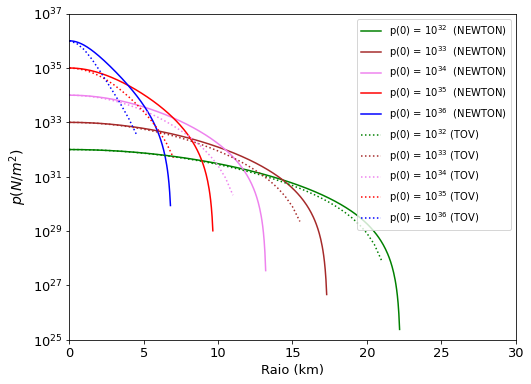

In [ ]:
plt.figure(figsize = (8,6))

#plt.plot(df_31_NEWTON['R_31 (km)'],df_31_NEWTON['p (N/m2)'],color ='red',label =r'p(0) = $10^{31}$ (NEWTON)', linestyle='-')
plt.plot(df_32_NEWTON['R (km)'],df_32_NEWTON['p (N/m2)'],color ='green',label =r'p(0) = $10^{32}$  (NEWTON)', linestyle='-')
plt.plot(df_33_NEWTON['R (km)'],df_33_NEWTON['p (N/m2)'],color ='brown',label =r'p(0) = $10^{33}$  (NEWTON)', linestyle='-')
plt.plot(df_34_NEWTON['R (km)'],df_34_NEWTON['p (N/m2)'],color ='violet',label =r'p(0) = $10^{34}$  (NEWTON)', linestyle='-')
plt.plot(df_35_NEWTON['R (km)'],df_35_NEWTON['p (N/m2)'],color ='red',label =r'p(0) = $10^{35}$  (NEWTON)', linestyle='-')
plt.plot(df_36_NEWTON['R (km)'],df_36_NEWTON['p (N/m2)'],color ='blue',label =r'p(0) = $10^{36}$  (NEWTON)', linestyle='-')


#plt.plot(df_31_TOV['R_31 (km)'],df_31_TOV['p (N/m2)'],color ='blue',label =r'p(0) = $10^{31}$ (TOV)', linestyle=':')
plt.plot(df_32_TOV['R (km)'],df_32_TOV['p (N/m2)'],color ='green',label =r'p(0) = $10^{32}$ (TOV)', linestyle=':')
plt.plot(df_33_TOV['R (km)'],df_33_TOV['p (N/m2)'],color ='brown',label =r'p(0) = $10^{33}$ (TOV)', linestyle=':')
plt.plot(df_34_TOV['R (km)'],df_34_TOV['p (N/m2)'],color ='violet',label =r'p(0) = $10^{34}$ (TOV)', linestyle=':')
plt.plot(df_35_TOV['R (km)'],df_35_TOV['p (N/m2)'],color ='red',label =r'p(0) = $10^{35}$ (TOV)', linestyle=':')
plt.plot(df_36_TOV['R (km)'],df_36_TOV['p (N/m2)'],color ='blue',label =r'p(0) = $10^{36}$ (TOV)', linestyle=':')
plt.ylabel(r'$p (N/m^2)$', size = 14)
plt.ylim(1E+25,1E+37)
plt.xlim(0,30)
plt.yscale('log')
plt.yticks(size = 13)
plt.xticks(size = 13)
#plt.xscale('log')
plt.xlabel('Raio (km)', size = 13)
plt.legend()
plt.savefig('rP_regimequalquer-all-NS.png')
plt.show()

#Massa-raio

In [24]:
NS_RQ_TOV = pd.DataFrame(columns=['m (Msol)','R (km)','p (N/m2)'])

NS_RQ_TOV['m (Msol)'] = df_32_TOV['m (Msol)'][len(df_32_TOV['m (Msol)'])-1],df_2e32_TOV['m (Msol)'][len(df_2e32_TOV['m (Msol)'])-1],df_4e32_TOV['m (Msol)'][len(df_4e32_TOV['m (Msol)'])-1],df_33_TOV['m (Msol)'][len(df_33_TOV['m (Msol)'])-1],df_2e33_TOV['m (Msol)'][len(df_2e33_TOV['m (Msol)'])-1],df_4e33_TOV['m (Msol)'][len(df_4e33_TOV['m (Msol)'])-1],df_34_TOV['m (Msol)'][len(df_34_TOV['m (Msol)'])-1],df_2e34_TOV['m (Msol)'][len(df_2e34_TOV['m (Msol)'])-1],df_4e34_TOV['m (Msol)'][len(df_4e34_TOV['m (Msol)'])-1],df_35_TOV['m (Msol)'][len(df_35_TOV['m (Msol)'])-1],df_2e35_TOV['m (Msol)'][len(df_2e35_TOV['m (Msol)'])-1],df_4e35_TOV['m (Msol)'][len(df_4e35_TOV['m (Msol)'])-1]

NS_RQ_TOV['R (km)'] = df_32_TOV['R (km)'][len(df_32_TOV['R (km)'])-1],df_2e32_TOV['R (km)'][len(df_2e32_TOV['R (km)'])-1],df_4e32_TOV['R (km)'][len(df_4e32_TOV['R (km)'])-1],df_33_TOV['R (km)'][len(df_33_TOV['R (km)'])-1],df_2e33_TOV['R (km)'][len(df_2e33_TOV['R (km)'])-1],df_4e33_TOV['R (km)'][len(df_4e33_TOV['R (km)'])-1],df_34_TOV['R (km)'][len(df_34_TOV['R (km)'])-1],df_2e34_TOV['R (km)'][len(df_2e34_TOV['R (km)'])-1],df_4e34_TOV['R (km)'][len(df_4e34_TOV['R (km)'])-1],df_35_TOV['R (km)'][len(df_35_TOV['R (km)'])-1],df_2e35_TOV['R (km)'][len(df_2e35_TOV['R (km)'])-1],df_4e35_TOV['R (km)'][len(df_4e35_TOV['R (km)'])-1]

NS_RQ_TOV['p (N/m2)'] = df_32_TOV['p (N/m2)'][0],df_2e32_TOV['p (N/m2)'][0],df_4e32_TOV['p (N/m2)'][0],df_33_TOV['p (N/m2)'][0],df_2e33_TOV['p (N/m2)'][0],df_4e33_TOV['p (N/m2)'][0],df_34_TOV['p (N/m2)'][0],df_2e34_TOV['p (N/m2)'][0],df_4e34_TOV['p (N/m2)'][0],df_35_TOV['p (N/m2)'][0],df_2e35_TOV['p (N/m2)'][0],df_4e35_TOV['p (N/m2)'][0]

NS_RQ_TOV = NS_RQ_TOV.sort_values(by='R (km)')

In [25]:
NS_RQ_TOV

,m (Msol),R (km),p (N/m2)
11,0.605295,5.50001,4.000000e+35
10,0.651959,6.00001,2.000000e+35
9,0.695007,7.00001,1.000000e+35
8,0.724155,8.50001,4.000000e+34
7,0.718894,9.50001,2.000000e+34
6,0.696943,11.00001,1.000000e+34
5,0.636624,12.50001,4.000000e+33
4,0.579206,14.00001,2.000000e+33
3,0.515279,15.50001,1.000000e+33
2,0.429180,17.50001,4.000000e+32


#Dados observacionais

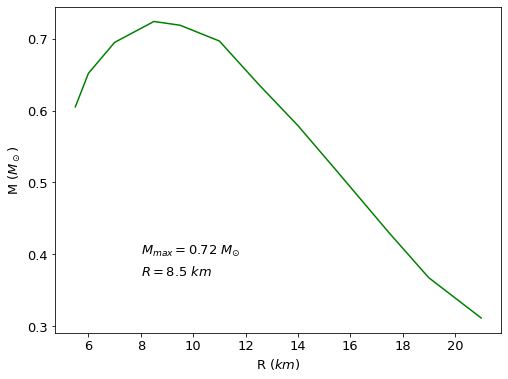

In [41]:
plt.figure(figsize = (8,6))

#plt.scatter(NS_RQ_TOV['R (km)'],NS_RQ_TOV['m (Msol)'], color='green', ls='-')
plt.plot(NS_RQ_TOV['R (km)'],NS_RQ_TOV['m (Msol)'], color='green', ls='-')


plt.yticks(size = 13)
plt.xticks(size = 13)

plt.annotate(r'$M_{max} = 0.72$ $M_{\odot}$',xy=(8,0.4),size = 13)
plt.annotate(r'$R = 8.5$ $km$ ',xy=(8,0.37),size = 13)

plt.xlabel(r"R $(km)$", size = 13)
plt.ylabel(r"M ($M_\odot$)", size = 13)
#plt.xlim(0,0.005)
#plt.ylim(1.1,2.6)

#plt.legend(loc=1,prop = {'size':10})
plt.savefig('mass-radii_NS.png')

In [ ]:
massa = [1.7,1.06,1.25,1.86,1.34,1.9,1.1,2.4,]
erromassa = [0.05,0.11,0.11,0.16,0.16,0.6,0.4,0.3]

In [ ]:
 
 
massa = [1.31,1.30,1.27,1.20,1.47]
erromassa = [0.11,0.11,0.01,0.14,0.43]

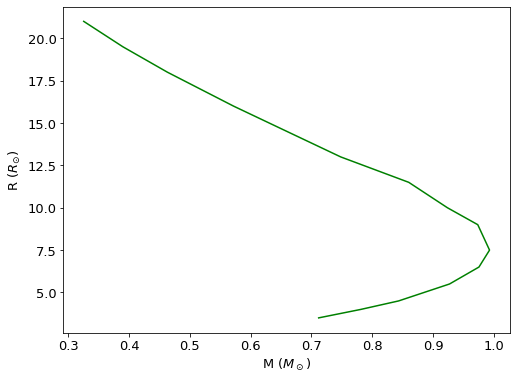

In [ ]:
plt.figure(figsize = (8,6))

plt.plot(NS_RQ_TOV['m (Msol)'], NS_RQ_TOV['R (km)'], color='green', ls='-')


plt.yticks(size = 13)
plt.xticks(size = 13)

plt.ylabel(r"R ($R_{\odot}$)", size = 13)
plt.xlabel(r"M ($M_\odot$)", size = 13)
#plt.xlim(0,0.005)
#plt.ylim(1.1,2.6)

#plt.legend(loc=1,prop = {'size':10})
plt.savefig('mass-radii_NS.png')